In [154]:
import os
import numpy as np
from utils import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [94]:
# Cada uno aqui ubicad vuestra carpeta de datos
data_dir = os.path.join("..","..","..","data")

In [95]:
train_data, train_labels, test_data, test_labels, test_names = load_data(data_dir, norm=False)


In [157]:
select_train_data = np.array([train_data[i] for i, label in enumerate(train_labels) if label in (21,22)])
select_train_data = select_train_data / 255

select_train_labels = np.array([label for label in train_labels if label in (21,22)])
select_train_labels = select_train_labels - 21

Text(0, 0.5, 'Cumulative explained variance')

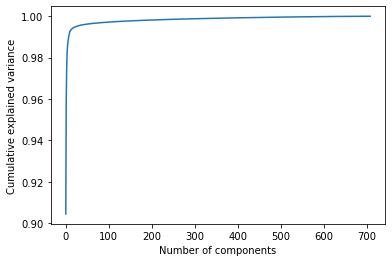

In [158]:
pca_transformer = PCA().fit(select_train_data.reshape(-1,(224*224*3)))
plt.plot(np.cumsum(pca_transformer.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

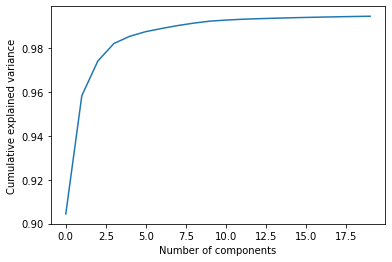

In [159]:
pca_transformer = PCA(20).fit(select_train_data.reshape(-1,(224*224*3)))
plt.plot(np.cumsum(pca_transformer.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [160]:
pca_transformer = PCA(3).fit(select_train_data.reshape(-1,(224*224*3)))
pca_train_data = pca_transformer.transform(select_train_data.reshape(-1,(224*224*3)))

In [163]:
select_test_data = np.array([test_data[i] for i, label in enumerate(test_labels) if label in (21,22)])
select_test_data = select_test_data / 255
pca_test_data = pca_transformer.transform(select_test_data.reshape(-1,(224*224*3)))

select_test_labels = np.array([label for label in test_labels if label in (21,22)])
select_test_labels = select_test_labels - 21

In [218]:
# model_path = os.path.join(os.getcwd(), "pca+nn.h5")
# if os.path.exists(model_path):
#     model = load_model(model_path)
# else:

ea = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
mc = ModelCheckpoint(filepath=os.path.join("model_checkpoints", "{val_accuracy:.5f}.h5"), monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

inputs = Input(shape=(pca_train_data.shape[1]))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(0.001),loss="binary_crossentropy", metrics=['accuracy'])
model.fit(pca_train_data, select_train_labels, epochs=100, batch_size=8, verbose=0, validation_data=(pca_test_data, select_test_labels), callbacks=[ea, mc])



Epoch 00001: val_accuracy improved from -inf to 0.66990, saving model to model_checkpoints\0.66990.h5

Epoch 00002: val_accuracy improved from 0.66990 to 0.67961, saving model to model_checkpoints\0.67961.h5

Epoch 00003: val_accuracy improved from 0.67961 to 0.69903, saving model to model_checkpoints\0.69903.h5

Epoch 00004: val_accuracy improved from 0.69903 to 0.71845, saving model to model_checkpoints\0.71845.h5

Epoch 00005: val_accuracy did not improve from 0.71845

Epoch 00006: val_accuracy did not improve from 0.71845

Epoch 00007: val_accuracy did not improve from 0.71845

Epoch 00008: val_accuracy did not improve from 0.71845

Epoch 00009: val_accuracy did not improve from 0.71845

Epoch 00010: val_accuracy did not improve from 0.71845

Epoch 00011: val_accuracy did not improve from 0.71845

Epoch 00012: val_accuracy did not improve from 0.71845

Epoch 00013: val_accuracy did not improve from 0.71845

Epoch 00014: val_accuracy did not improve from 0.71845
Epoch 00014: early 

In [219]:
model = load_model("model_checkpoints\\pca+nn_ver1.h5")
model.evaluate(pca_test_data, select_test_labels, batch_size=1)

103/103 [==============================] - 0s 843us/step - loss: 0.5438 - accuracy: 0.8058


[0.543760359287262, 0.8058252334594727]